In [163]:
import numpy as np
import pandas as pd

In [164]:
#Knowing the Encoding of the dataset 
import chardet

with open("data.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7257971165545478, 'language': ''}


In [165]:
df = pd.read_csv("data.csv",encoding="Windows-1252")


In [166]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [167]:
df.shape

(5572, 5)

## PROJECT FLOW
   1. DATA CLEANING
   2. EDA
   3. TEXT PREPROCESSING
   4. MODEL BUILDING
   5. EVALUATION
   6. IMPROVEMENT
   7. DEPLOYMENT

## DATA CLEANING


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [171]:
#dropping the last 3 cols as they only containg NULL values


df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [172]:
df.sample(5)

,v1,v2
3681,ham,"Hello, hello, hi lou sorry it took so long 2 r..."
5241,ham,Its a part of checking IQ
4172,ham,Ok... But they said i've got wisdom teeth hidd...
3774,ham,Hi! You just spoke to MANEESHA V. We'd like to...
1950,ham,Oh ic. I thought you meant mary jane.


In [173]:
# renaming the cols names as it is not so clear
df.rename(columns = {"v1":"target","v2":"text"},inplace = True)

In [174]:
df.sample(5)

,target,text
5473,ham,Ok lor Ì_ reaching then message me.
936,ham,"Since when, which side, any fever, any vomitin."
4234,spam,FREEMSG: Our records indicate you may be entit...
1666,ham,Guess who spent all last night phasing in and ...
83,ham,You will be in the place of that man


In [175]:
#now change target values to 0 or 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [176]:
df["target"] = encoder.fit_transform(df["target"])

In [177]:
df.sample(5)

,target,text
2195,0,V-aluable. A-ffectionate. L-oveable. E-ternal....
3936,0,"Yeah, in fact he just asked if we needed anyth..."
1228,1,FREE entry into our å£250 weekly comp just sen...
2091,0,Then get some cash together and I'll text jason
2599,0,"Gosh that , what a pain. Spose I better come t..."


In [178]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [179]:
#check for duplicate values
df.duplicated().sum()

403

In [180]:
df = df.drop_duplicates(keep="first")

In [181]:
df.shape

(5169, 2)

## EDA

In [183]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [184]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

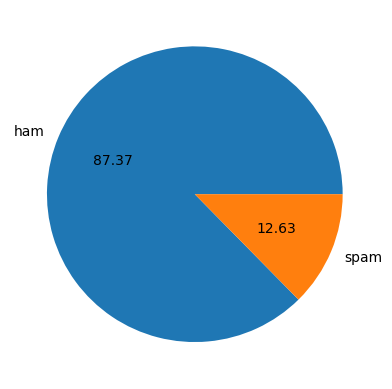

In [185]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels =["ham","spam"],autopct="%0.2f")
plt.show()

In [186]:
#data is imabalanced

In [187]:
!pip install nltk

import nltk


In [188]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Manas
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [189]:
df["num_characters"] = df["text"].apply(len)

In [190]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [191]:
#num of words
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
df['num_words'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))

In [192]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [193]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [194]:
df["num_sentences"] = df["text"].apply(lambda x: len(list(nlp(str(x)).sents)))


In [195]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [196]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,17.695299,2.100600
std,58.236293,12.672457,1.456788
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,14.000000,2.000000
75%,117.000000,25.000000,3.000000
max,910.000000,214.000000,27.000000


In [197]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.452613,1.961470
std,56.358207,12.858450,1.401099
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,21.000000,2.000000
max,910.000000,214.000000,27.000000


In [198]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,26.289433,3.062787
std,30.137753,6.579189,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,28.000000,3.000000
75%,157.000000,30.000000,4.000000
max,224.000000,41.000000,9.000000


In [199]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

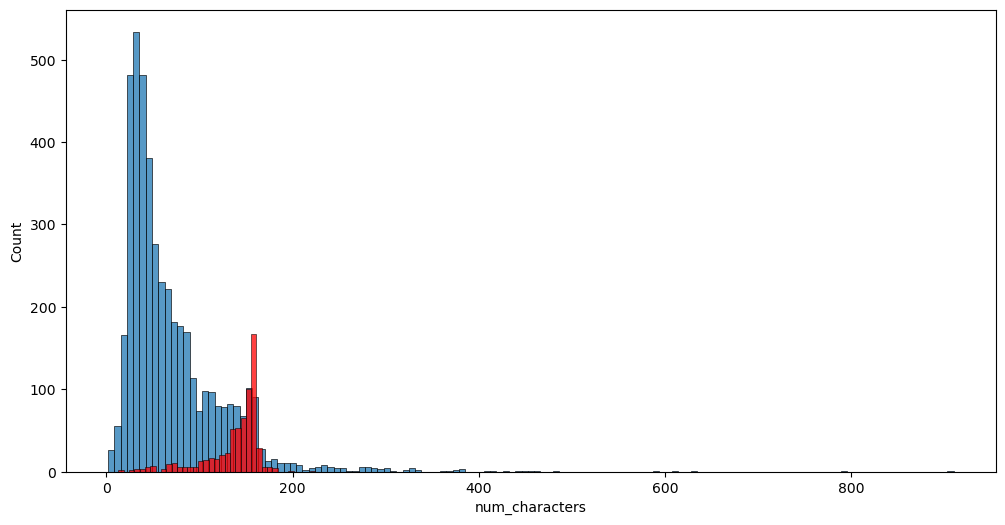

In [200]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

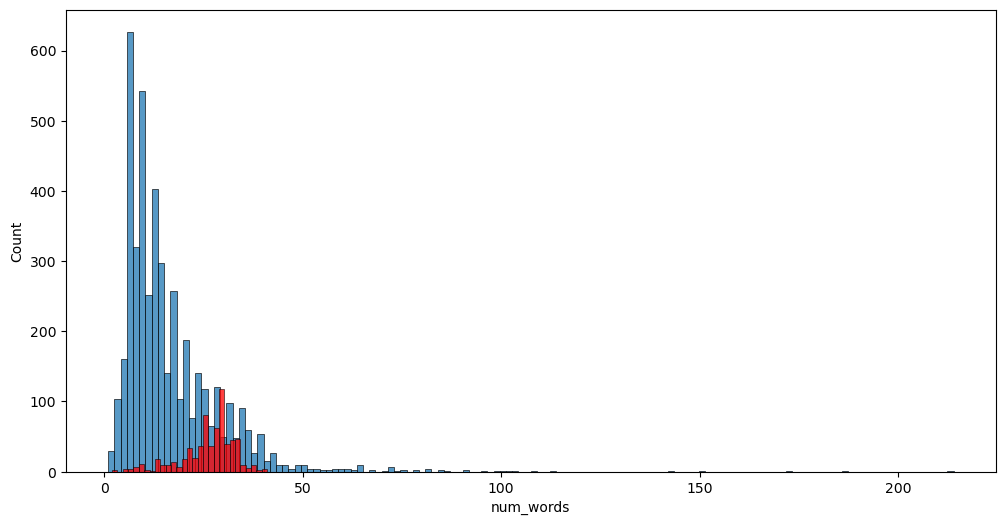

In [201]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

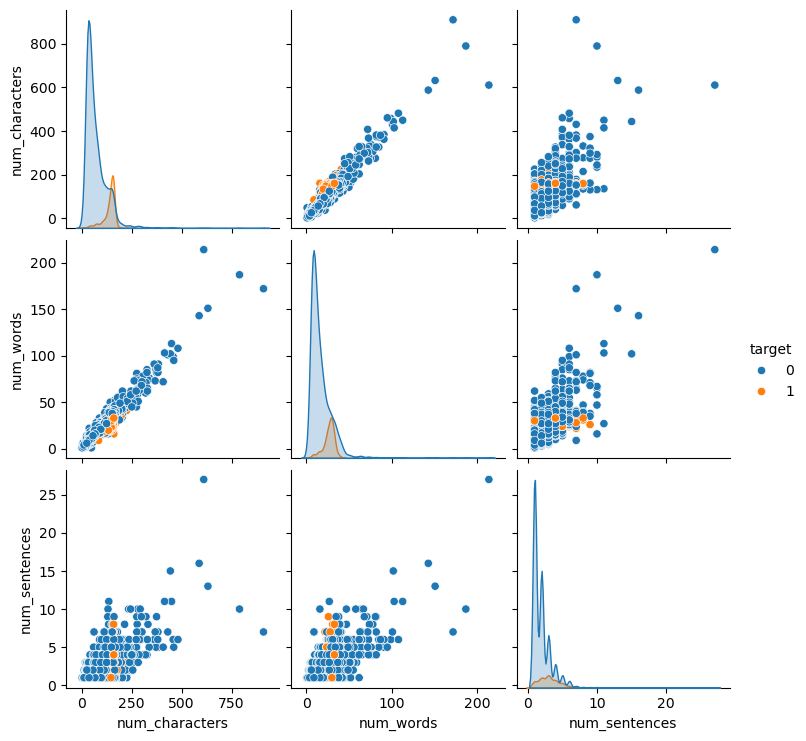

In [202]:
sns.pairplot(df,hue='target')


<Axes: >

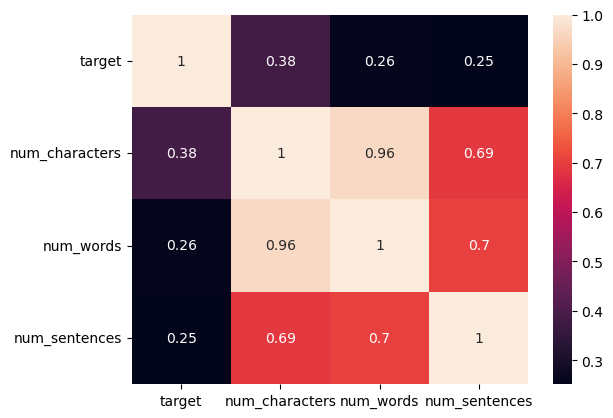

In [203]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

##3. DATA PROCESSING


-Lower Case
-Tokenization
-Removing Special characters
-Removing stop words and punctuation
-Stemming


In [206]:
from nltk.corpus import stopwords
nltk.download("stopwords")
len(stopwords.words("english"))

[nltk_data] Downloading package stopwords to C:\Users\Manas
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


198

In [207]:
import nltk
nltk.download('punkt_tab')
import string

[nltk_data] Downloading package punkt_tab to C:\Users\Manas
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [208]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("love")

'love'

In [209]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if (i.isalnum()):
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

    

In [210]:
transform_text("How are you Manas?")

'mana'

In [211]:
df["text"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [212]:
df["transformed_text"] = df["text"].apply(transform_text)

In [213]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [214]:
#now we will use text and transformed_text columns further



In [215]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,background_color="black")

In [216]:
 spam_wc  = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))

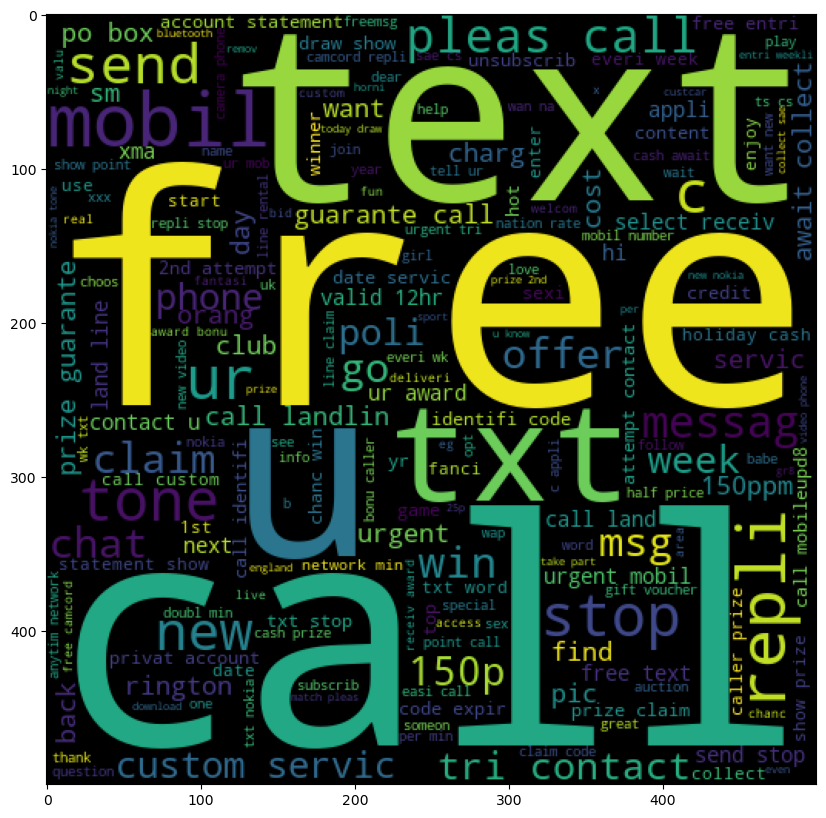

In [217]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [218]:
ham_wc  = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))

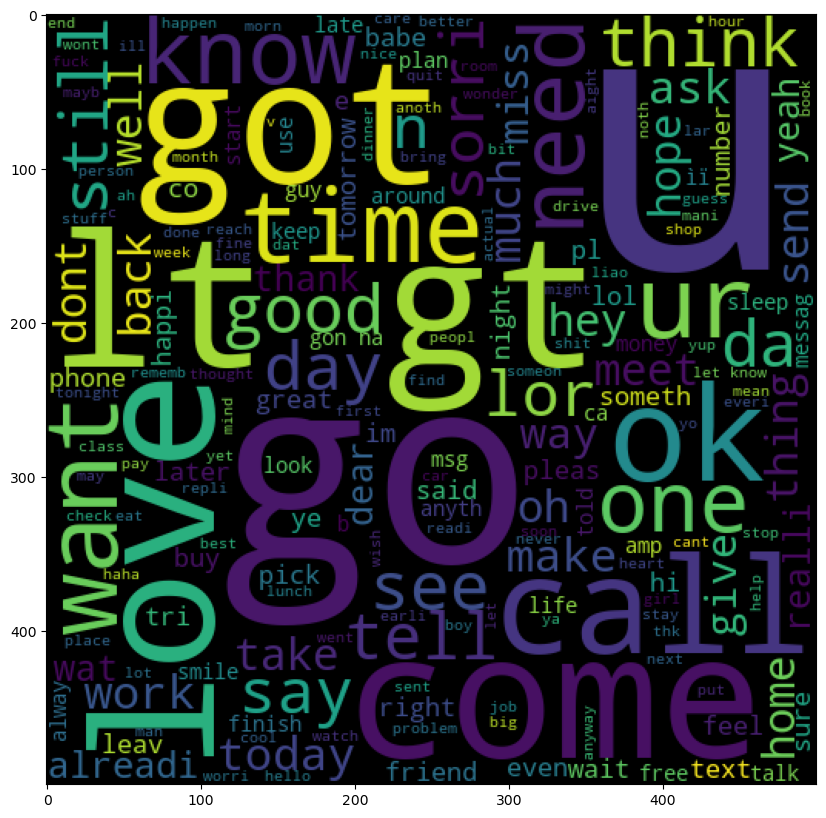

In [219]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)
           

In [220]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [221]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [222]:
len(spam_corpus)

9939

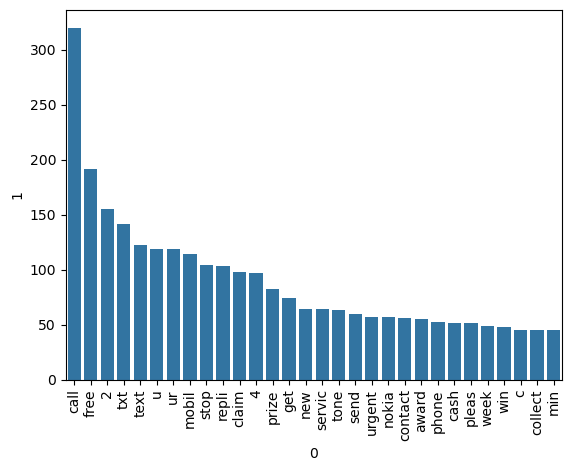

In [223]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [224]:
ham_corpus =[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [225]:
len(ham_corpus)

35404

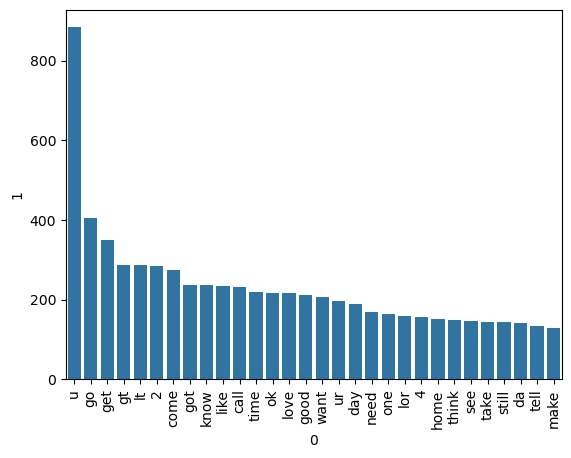

In [226]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

## 4. MODEL BUILDING


In [228]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [229]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [230]:
import numpy as np
import pandas as pd

In [231]:
#Knowing the Encoding of the dataset 
import chardet

with open("data.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'Windows-1252', 'confidence': 0.7257971165545478, 'language': ''}


In [232]:
df = pd.read_csv("data.csv",encoding="Windows-1252")


In [233]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [234]:
df.shape

(5572, 5)

## PROJECT FLOW
   1. DATA CLEANING
   2. EDA
   3. TEXT PREPROCESSING
   4. MODEL BUILDING
   5. EVALUATION
   6. IMPROVEMENT
   7. DEPLOYMENT

## DATA CLEANING


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [238]:
#dropping the last 3 cols as they only containg NULL values


df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [239]:
df.sample(5)

,v1,v2
4249,ham,How much for an eighth?
343,ham,Am not interested to do like that.
694,ham,Ah poop. Looks like ill prob have to send in m...
3600,ham,"Jay told me already, will do"
3388,ham,O. Guess they both got screwd


In [240]:
# renaming the cols names as it is not so clear
df.rename(columns = {"v1":"target","v2":"text"},inplace = True)

In [241]:
df.sample(5)

,target,text
193,ham,It will stop on itself. I however suggest she ...
5007,ham,Go fool dont cheat others ok
1674,ham,Nah dub but je still buff
4738,ham,We have pizza if u want
1919,ham,Yar i wanted 2 scold u yest but late already.....


In [242]:
#now change target values to 0 or 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [243]:
df["target"] = encoder.fit_transform(df["target"])

In [244]:
df.sample(5)

,target,text
3072,0,Somebody should go to andros and steal ice
626,0,How many licks does it take to get to the cent...
4749,0,"If you're still up, maybe leave the credit car..."
1302,0,FRAN I DECIDED 2 GO N E WAY IM COMPLETELY BROK...
4444,0,"2 celebrate my båÕday, y else?"


In [245]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [246]:
#check for duplicate values
df.duplicated().sum()

403

In [247]:
df = df.drop_duplicates(keep="first")

In [248]:
df.shape

(5169, 2)

## EDA

In [250]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [251]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

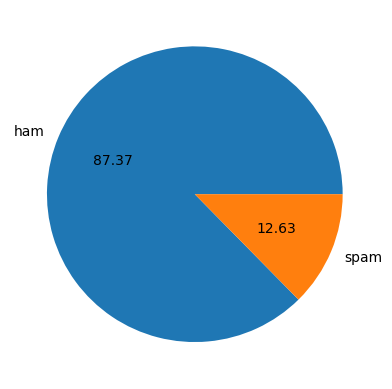

In [252]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels =["ham","spam"],autopct="%0.2f")
plt.show()

In [253]:
#data is imabalanced

In [254]:
!pip install nltk

import nltk


In [255]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Manas
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [256]:
df["num_characters"] = df["text"].apply(len)

In [257]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [258]:
#num of words
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
df['num_words'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))

In [259]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [260]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [261]:
df["num_sentences"] = df["text"].apply(lambda x: len(list(nlp(str(x)).sents)))


In [262]:
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [263]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,17.695299,2.100600
std,58.236293,12.672457,1.456788
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,14.000000,2.000000
75%,117.000000,25.000000,3.000000
max,910.000000,214.000000,27.000000


In [264]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.452613,1.961470
std,56.358207,12.858450,1.401099
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,21.000000,2.000000
max,910.000000,214.000000,27.000000


In [265]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,26.289433,3.062787
std,30.137753,6.579189,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,28.000000,3.000000
75%,157.000000,30.000000,4.000000
max,224.000000,41.000000,9.000000


In [266]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

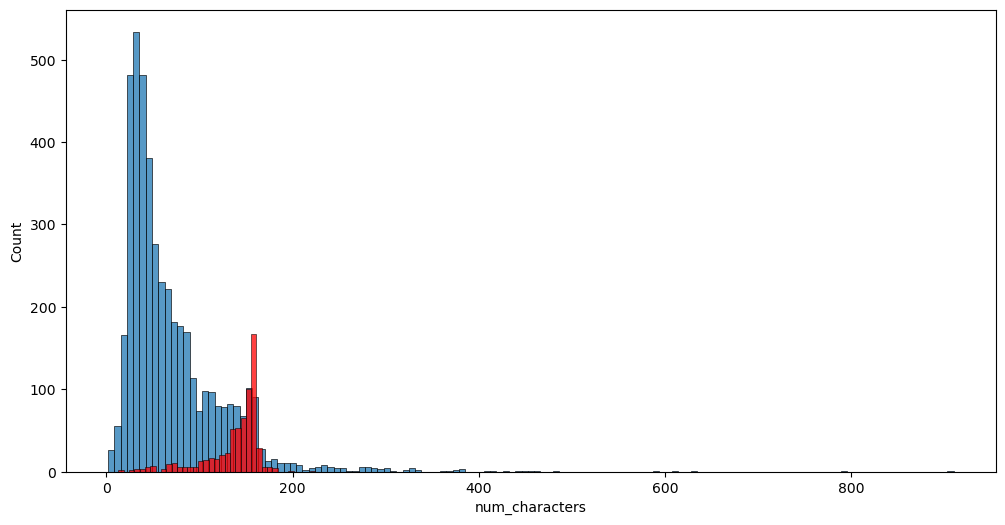

In [267]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

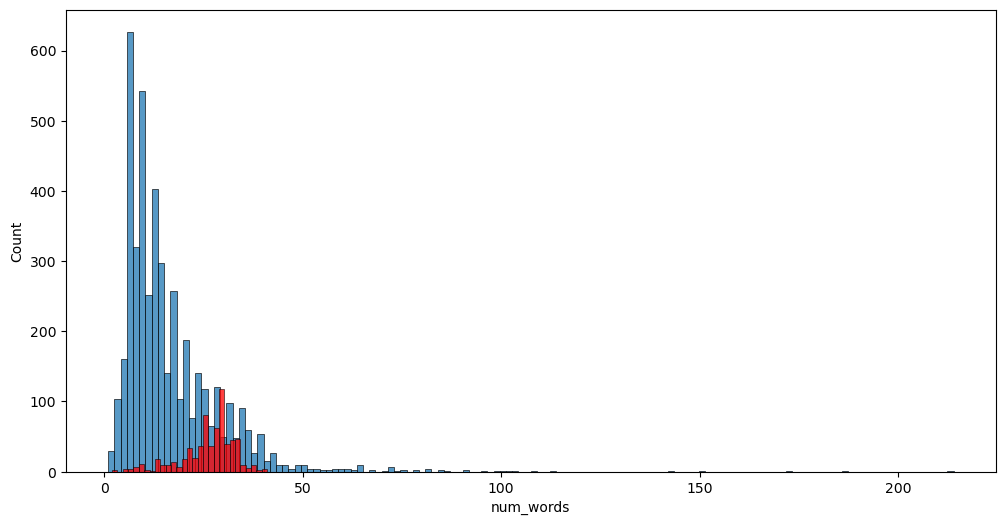

In [268]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

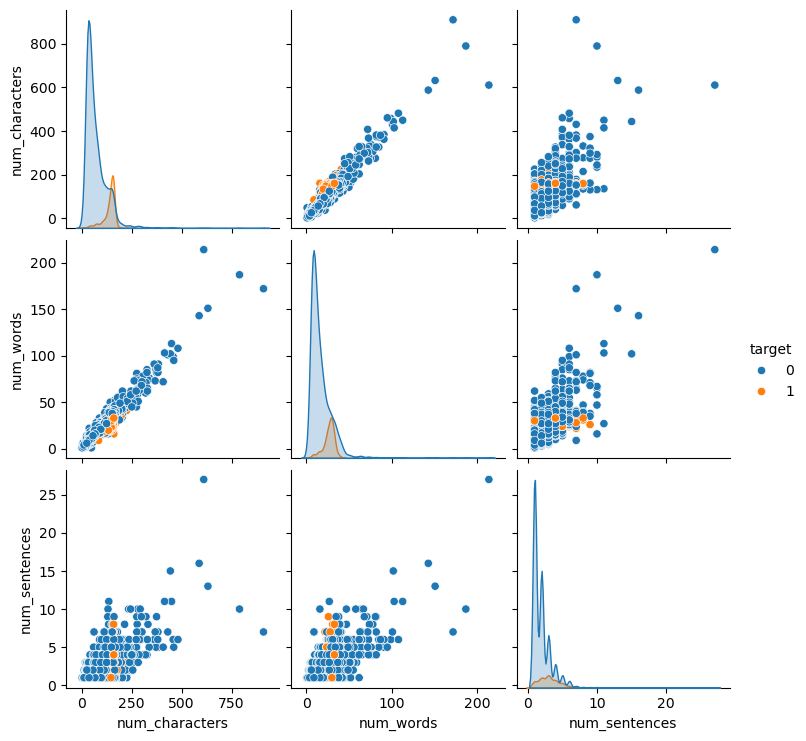

In [269]:
sns.pairplot(df,hue='target')


<Axes: >

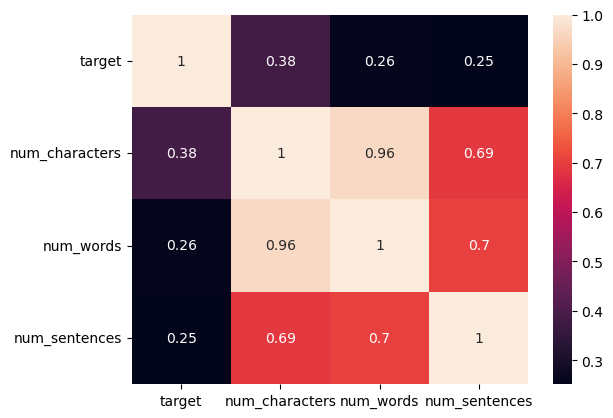

In [270]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

##3. DATA PROCESSING


-Lower Case
-Tokenization
-Removing Special characters
-Removing stop words and punctuation
-Stemming


In [273]:
from nltk.corpus import stopwords
nltk.download("stopwords")
len(stopwords.words("english"))

[nltk_data] Downloading package stopwords to C:\Users\Manas
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


198

In [274]:
import nltk
nltk.download('punkt_tab')
import string

[nltk_data] Downloading package punkt_tab to C:\Users\Manas
[nltk_data]     Yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [275]:
#stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("love")

'love'

In [276]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if (i.isalnum()):
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

    

In [277]:
transform_text("How are you Manas?")

'mana'

In [278]:
df["text"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [279]:
df["transformed_text"] = df["text"].apply(transform_text)

In [280]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [281]:
#now we will use text and transformed_text columns further



In [282]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,background_color="black")

In [283]:
 spam_wc  = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))

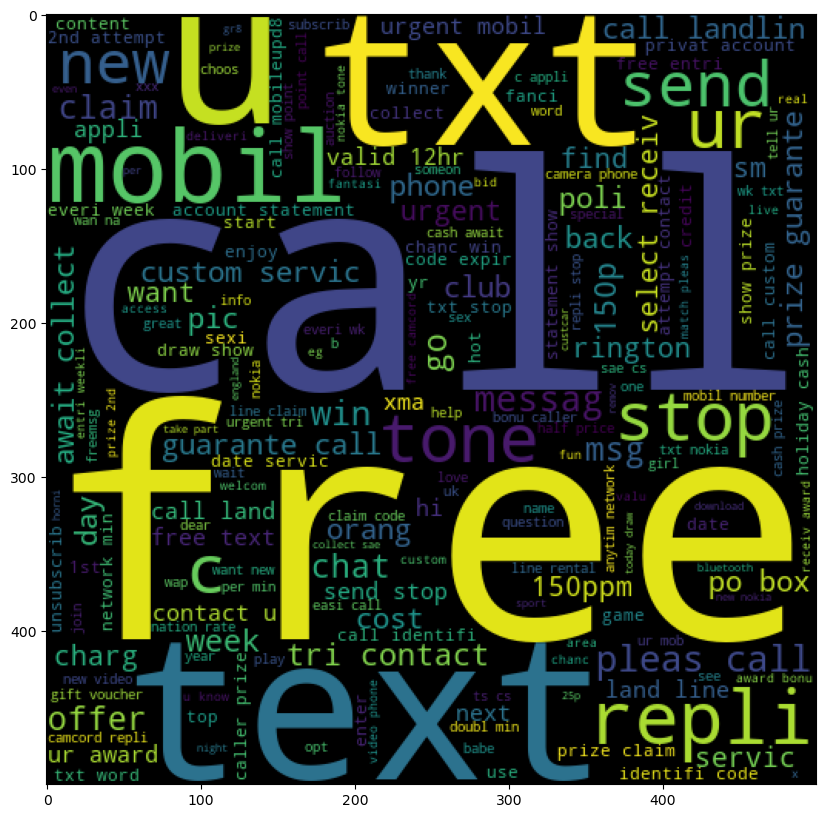

In [284]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [285]:
ham_wc  = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))

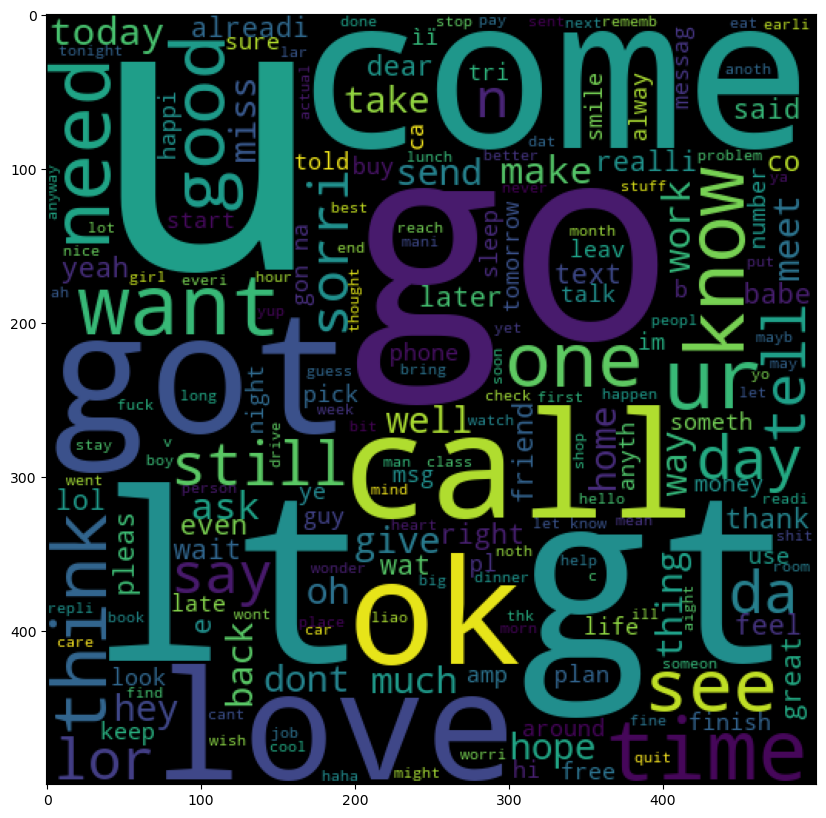

In [286]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)
           

In [287]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [288]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [289]:
len(spam_corpus)

9939

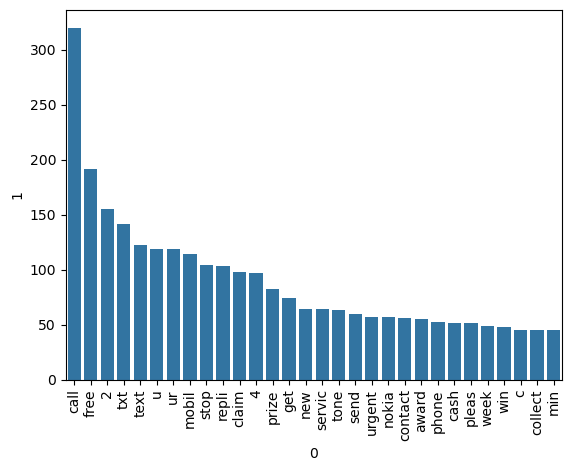

In [290]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [291]:
ham_corpus =[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [292]:
len(ham_corpus)

35404

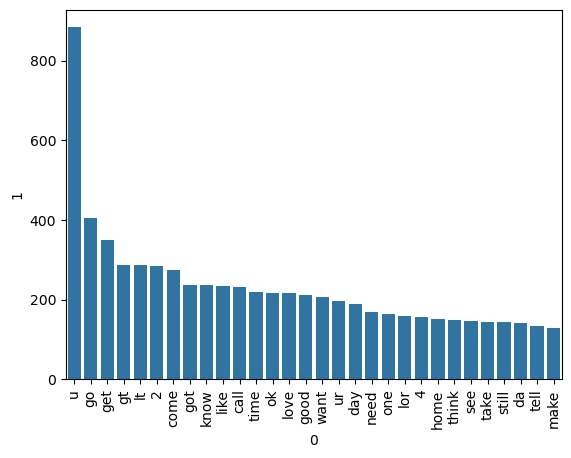

In [293]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

## 4. MODEL BUILDING


In [295]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=7000)

In [296]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [297]:
X.shape

(5169, 6708)

In [298]:
y = df["target"].values

In [299]:

y

array([0, 0, 1, ..., 0, 0, 0])

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =2)

In [302]:
 from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [303]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [304]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [305]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [306]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [307]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))


In [308]:
X.shape

(5169, 6708)

In [309]:
y = df["target"].values

In [310]:

y

array([0, 0, 1, ..., 0, 0, 0])

In [311]:
from sklearn.model_selection import train_test_split

In [312]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =2)

In [313]:
 from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [314]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [315]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [316]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [317]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [318]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))
